In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from konlpy.tag import Okt
okt= Okt()

In [4]:
pd.set_option('display.max_columns', None)
df1 = pd.read_csv('standard_df_final.csv',index_col = 0)
df1['code'] = df1.code.apply(lambda x : str(x).zfill(6))
df1['Index_return_6'] = df1['Index_return_6']/100
df1['Index_return_1Y'] = df1['Index_return_1Y']/100
df1.insert(17, '6month_return_index', df1['6month_return'] - df1['Index_return_6'])
df1.insert(22, '1Year_return_index', df1['1Year_return'] - df1['Index_return_1Y'])
df1

,작성일,개장일,Market,Name,code,Sector,adjusted_Open,adjusted_Close,report_Open,report_Close,괴리율,adjusted_TargetPrice,report_TargetPrice,액면비율,Index_return_6,Index_return_1Y,6month_개장일,6month_return_index,6month_return,6month_log_return,6month_Close,1year_개장일,1Year_return_index,1Year_return,1Year_log_return,1Year_Close,투자의견,idx,작성자,제공출처
0,2018-04-18,2018-04-18,^KS11,한화생명,088350,보험업,6160.0,6160.0,6160,6160,0.785714,11000.00000,11000,1.000000,-0.135025,-0.107344,2018-10-15,-0.104423,-0.239448,-0.273711,4685.0,2019-04-18,-0.248988,-0.356331,-0.440571,3965.0,buy,473108,박혜진,이베스트증권
1,2018-05-31,2018-05-31,^KS11,한화생명,088350,보험업,5740.0,5570.0,5740,5570,0.620209,9300.00000,9300,1.000000,-0.133549,-0.157354,2018-11-27,-0.080096,-0.213645,-0.240346,4380.0,2019-05-31,-0.266345,-0.423698,-0.551124,3210.0,buy,479661,성용훈,한화투자증권
2,2018-09-18,2018-09-18,^KS11,한화생명,088350,보험업,4880.0,4860.0,4880,4860,0.229508,6000.00000,6000,1.000000,-0.057545,-0.103184,2019-03-15,-0.077229,-0.134774,-0.144764,4205.0,2019-09-18,-0.362865,-0.466049,-0.627452,2595.0,buy,493832,김지영,교보증권
3,2021-02-19,2021-02-19,^KS11,한화생명,088350,보험업,3120.0,3230.0,3120,3230,0.121795,3500.00000,3500,1.000000,0.016511,NaN,2021-08-18,0.026833,0.043344,0.042431,3370.0,2022-02-18,NaN,NaN,NaN,NaN,buy,583203,정태준,유안타증권
4,2012-11-09,2012-11-09,^KS11,한화생명,088350,보험업,7410.0,7330.0,7410,7330,0.214575,9000.00000,9000,1.000000,0.027326,0.042249,2013-05-08,-0.102360,-0.075034,-0.077998,6780.0,2013-11-08,-0.139111,-0.096862,-0.101880,6620.0,buy,293653,이치영,이트레이드증권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,2015-03-17,2015-03-17,^KS11,사조산업,007160,어로 어업,79600.0,78500.0,79600,78500,1.010050,160000.00000,160000,1.000000,-0.043618,-0.027100,2015-09-11,0.057630,0.014013,0.013915,79600.0,2016-03-16,-0.158888,-0.185987,-0.205779,63900.0,strongbuy,345498,김승,SK증권
20289,2015-06-12,2015-06-12,^KS11,까뮤이앤씨,013700,건물 건설업,1245.0,1235.0,12450,12350,0.927711,2400.00000,24000,0.100000,-0.050644,-0.016831,2015-12-09,0.046595,-0.004049,-0.004057,1230.0,2016-06-10,0.020880,0.004049,0.004040,1240.0,strongbuy,353325,"이태경,한기현",현대증권
20290,2015-06-01,2015-06-01,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6425.0,6675.0,12850,13350,0.867704,12000.00000,24000,0.500000,-0.030067,-0.024143,2015-11-27,-0.289034,-0.319101,-0.384341,4545.0,2016-05-31,-0.461999,-0.486142,-0.665809,3430.0,strongbuy,352285,이상우,유진투자증권
20291,2015-03-17,2015-03-17,^KQ11,서전기전,189860,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",6750.0,7075.0,13500,14150,0.777778,12000.00000,24000,0.500000,0.053172,0.090229,2015-09-11,-0.279320,-0.226148,-0.256375,5475.0,2016-03-16,-0.582808,-0.492580,-0.678415,3590.0,strongbuy,345568,이상우,유진투자증권


In [7]:
df_temp = df1[['6month_return_index', '6month_return',
       '6month_log_return', '1Year_return_index',
       '1Year_return', '1Year_log_return','투자의견','idx']]

In [8]:
df_temp.dropna(axis=0,inplace=True)
df_temp

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,투자의견,idx
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,buy,473108
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,buy,479661
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,buy,493832
4,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,buy,293653
5,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,buy,400398
...,...,...,...,...,...,...,...,...
20288,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,strongbuy,345498
20289,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,strongbuy,353325
20290,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,strongbuy,352285
20291,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,strongbuy,345568


In [9]:
temp_list = df_temp.idx.tolist()

In [10]:
len(temp_list)

18779

In [11]:
df = pd.read_csv('sample_report_token_okt_khaiii.csv',index_col=0)
df = df.set_index('idx')
df.dropna(inplace=True)

In [12]:
df_aim=pd.merge(df_temp, df, how='inner', on='idx')
df_aim.drop(['투자의견_x','code','idx.1','작성일'],axis=1,inplace=True)
df_aim.rename(columns={'투자의견_y':'투자의견'},inplace=True)

In [72]:
df_aim

,6month_return_index,6month_return,6month_log_return,1Year_return_index,1Year_return,1Year_log_return,idx,투자의견,report,okt_tokens,khaiii_tokens
0,-0.104423,-0.239448,-0.273711,-0.248988,-0.356331,-0.440571,473108,buy,년 월 일 기업분석건설유틸리티 한화생명 기업이슈 브리프보험 년 월 일 ...,"['건설', '유틸리티', '생명', '이슈', '브리프', '보험', '조원', ...",년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...
1,-0.080096,-0.213645,-0.240346,-0.266345,-0.423698,-0.551124,479661,buy,년 월 일 기업분석 한화생명 시점은 불확실하나 Upside risk는 가장 ...,"['생명', '가장', '성용', '유지', '목표', '주가', '하향', '주가...",년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...
2,-0.077229,-0.134774,-0.144764,-0.362865,-0.466049,-0.627452,493832,buy,보험업 Neutral Initiation 종목명 투자의견 목표주가M ...,"['보험', '목표', '주가', '화재', '현대', '해상', '손해', '보험...",보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...
3,-0.102360,-0.075034,-0.077998,-0.139111,-0.096862,-0.101880,293653,buy,이슈코멘트 l 기업 이트레이드증권 리서치본부 FY Q 순이익 억원으로...,"['이슈', '본부', '순이익', '억원', '사업', '계획', '부합', '수...",이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...
4,-0.175222,-0.016224,-0.016357,-0.193884,0.084071,0.080723,400398,buy,보험Positive 걱정이 줄었으니 기대가 커지는 것이 ...,"['보험', '걱정', '기대', '순리', '성용', '보험', '주가', '가지...",보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...
...,...,...,...,...,...,...,...,...,...,...,...
18713,0.057630,0.014013,0.013915,-0.158888,-0.185987,-0.205779,345498,strongbuy,Microsoft Word CUNITdoc사조산업 재평가의 시기가 왔다 사조그룹...,"['산업', '평가', '시기', '그룹', '실질', '지주회사', '역할', '...",사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...
18714,0.046595,-0.004049,-0.004057,0.020880,0.004049,0.004040,353325,strongbuy,Microsoft Word doc 증권보험신사업 Analy...,"['보험', '사업', '이태경', '한기현', '이지수', '거대도시', '스마트...",증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...
18715,-0.289034,-0.319101,-0.384341,-0.461999,-0.486142,-0.665809,352285,strongbuy,기업분석 서전기전KQ 상반기보단 하반기 기계조선건...,"['기전', '상반기', '하반기', '기계', '조선', '건설', '부동산', ...",기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...
18716,-0.279320,-0.226148,-0.256375,-0.582808,-0.492580,-0.678415,345568,strongbuy,기계전력산업 송배전망 증설 잊고 지내던 성장산업 Overweight상향 발...,"['기계', '전력', '산업', '송배전', '증설', '성장', '산업', '상...",기계 전력 산업 송배 전망 증설 성장 산업 상향 발전 설비 증설 뿐 송배 전망 증설...


In [ ]:
##################################################

### outlier제거

In [16]:
df1 = df_aim.copy()

In [17]:
def get_outlier(df=None, weight=1.5):
    
    percent_25 = np.percentile(df, 25)
    percent_75 = np.percentile(df, 75)
    iqr = percent_75 - percent_25

    highest_lim = percent_75 + (iqr*weight)
    lowest_lim = percent_25 - (iqr*weight)

    outlier_idx = df[(df > highest_lim) | (df < lowest_lim)].index.tolist()
    return outlier_idx

In [18]:
df1.drop(get_outlier(df1['6month_return'], weight=1.5), axis=0, inplace=True)

In [19]:
df1 =df1[['khaiii_tokens','6month_return']]

In [20]:
df1

,khaiii_tokens,6month_return
0,년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...,-0.239448
1,년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...,-0.213645
2,보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...,-0.134774
3,이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...,-0.075034
4,보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...,-0.016224
...,...,...
18713,사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...,0.014013
18714,증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...,-0.004049
18715,기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...,-0.319101
18716,기계 전력 산업 송배 전망 증설 성장 산업 상향 발전 설비 증설 뿐 송배 전망 증설...,-0.226148


### kmeans

In [21]:
a =pd.concat([df1['6month_return'],df1['6month_return']],axis=1)

In [22]:
from sklearn.cluster import KMeans
inertias=[]
for i in range(1,10):
    km = KMeans(n_clusters=i, init='random')
    km.fit(a)
    inertias.append(km.inertia_)
inertias

[1646.0539418876722,
 596.5868550342358,
 298.8633690195253,
 179.90329931626886,
 120.47689430318046,
 84.81010779653418,
 62.40931252920361,
 48.82102321269501,
 38.356807855421174]

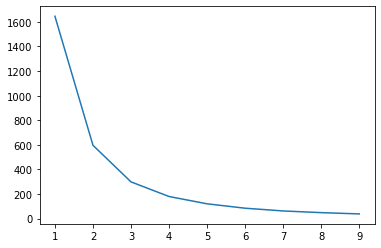

In [23]:
plt.plot(range(1,10),inertias)

2    8395
0    5874
1    3671
dtype: int64


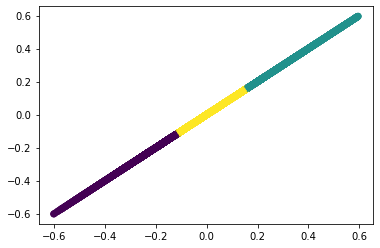

In [24]:
km = KMeans(n_clusters =3)
km.fit(a)
print(pd.Series(km.labels_).value_counts())
plt.scatter(a.iloc[:,0], a.iloc[:,1], c=km.labels_)

3    6791
0    5011
1    3889
2    2249
dtype: int64


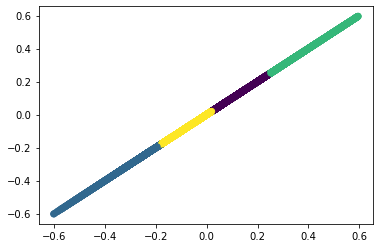

In [25]:
km = KMeans(n_clusters =4)
km.fit(a)
print(pd.Series(km.labels_).value_counts())
plt.scatter(a.iloc[:,0], a.iloc[:,1], c=km.labels_)

In [26]:
a['kmeans'] = km.labels_

In [27]:
print(a[a.kmeans == 0]['6month_return'].iloc[:,0].sort_values().iloc[0])
print(a[a.kmeans == 0]['6month_return'].iloc[:,0].sort_values().iloc[-1])

0.019482619240097
0.2453781512605042


In [28]:
print(a[a.kmeans == 1]['6month_return'].iloc[:,0].sort_values().iloc[0])
print(a[a.kmeans == 1]['6month_return'].iloc[:,0].sort_values().iloc[-1])

-0.6021008110432015
-0.1798941798941798


In [29]:
print(a[a.kmeans == 2]['6month_return'].iloc[:,0].sort_values().iloc[0])
print(a[a.kmeans == 2]['6month_return'].iloc[:,0].sort_values().iloc[-1])

0.2454873646209386
0.5956175298804781


In [30]:
print(a[a.kmeans == 3]['6month_return'].iloc[:,0].sort_values().iloc[0])
print(a[a.kmeans == 3]['6month_return'].iloc[:,0].sort_values().iloc[-1])

-0.1798365122615803
0.0194174757281553


In [31]:
a

,6month_return,6month_return,kmeans
0,-0.239448,-0.239448,1
1,-0.213645,-0.213645,1
2,-0.134774,-0.134774,3
3,-0.075034,-0.075034,3
4,-0.016224,-0.016224,3
...,...,...,...
18713,0.014013,0.014013,3
18714,-0.004049,-0.004049,3
18715,-0.319101,-0.319101,1
18716,-0.226148,-0.226148,1


In [32]:
df1['kmeans_label'] = a.kmeans
df1

,khaiii_tokens,6month_return,kmeans_label
0,년 월 일 기업 분석 건설유틸리티 한화생 명 기업 이슈 브리프보험 년 월 일 조원 ...,-0.239448,1
1,년 월 일 기업 분석 한화생 명 시점 성 용훈 유지 목표 주가하향 원 주가 원 상승...,-0.213645,1
2,보험업 종목명 투자 의견 목표 주가 삼성화재 현대 해상 손해 보험 메리츠화재 한화손...,-0.134774,3
3,이 슈 코멘트 기업 이트레이드증권 리 서치 본부 순이익 원 사업 계획 부합 실적 시...,-0.075034,3
4,보험 걱정 기대 것 순리 성 용훈 보험주 주가 가지 요인 금리 규제 공포 완화 저점...,-0.016224,3
...,...,...,...
18713,사조산업 재평가 시기 사 조 그 룹 실질 지주 회사 역할 수행 회사 참치어 상승 트...,0.014013,3
18714,증권 보험 신사업 이태경 한기현 이 지수 거대 도시 스마 트시티 스마트 시티 거대 ...,-0.004049,3
18715,기업 분석 서 전기전 상반기보 하반기 기계 조선 건설 부동산 담당 이상우 매출 원 ...,-0.319101,1
18716,기계 전력 산업 송배 전망 증설 성장 산업 상향 발전 설비 증설 뿐 송배 전망 증설...,-0.226148,1


In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
import re

def han_text_clean(text):
    text = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", text)
   
    return text

with open('stopwords-ko.txt', 'r', encoding = 'utf-8') as f:
    sw1 = f.read()
    sw1 = re.sub('\\n', ' ', sw1)
    sw1 = sw1.split()

stop_report = '리서치센터  Compliance Notice 본 조사분석자료는 제3자에게 사전 제공된 사실이 없습니다. 당사는 자료작성일 현재 본 조사분석자료에 언급된 종목의 지분을 1% 이상 보유하고 있지 않습니다. \
본 자료를 작성한 애널리스트는 자료작성일 현재 해당 종목과 재산적 이해관계가 없습니다. 본 자료에 게재된 내용은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭 없이 신의 성실하게 작성되었음을 확인합니다. \
본 자료는 투자자들의 투자판단에 참고가 되는 정보제공을 목적으로 배포되는 자료입니다. 본 자료에 수록된 내용은 당사 리서치센터의 추정치로서 오차가 발생할 수 있으며 정확성이나 완벽성은 보장하지 않습니다. \
본 자료를 이용하시는 분은 본 자료와 관련한 투자의 최종 결정은 자신의 판단으로 하시기 바랍니다. 따라서 어떠한 경우에도 본 자료는 투자 결과와 관련한 법적 책임소재의 증빙자료로 사용될 수 없습니다. \
본 조사분석자료는 당사 고객에 한하여 배포되는 자료로 당사의 허락 없이 복사, 대여, 배포 될 수 없습니다.\
투자등급 이 자료에 게재된 내용들은 본인의 의견을 정확하게 반영하고 있으며, 외부의 부당한 압력이나 간섭없이 작성되었음을 확인합니다.(작성자 : 하준두) 자료 제공일 현재\
당사는 상기 회사가 발행한 주식을 1% 이상 보유하고 있지 않습니다. 자료 제공일 현재 당사는 지난 1년간 상기 회사의 최초 증권시장 상장시 대표 주관사로 참여한 적이 없습니다. \
자료제공일 현재 조사분석 담당자는 상기회사가 발행한 주식 및 주식관련사채에 대하여 규정상 고지하여야 할 재산적 이해관계가 없으며, 추천의견을 제시함에 있어 어떠한 금전적 보상과도 연계되어 있지 않습니다. \
당자료는 상기 회사 및 상기회사의 유가증권에 대한 조사분석담당자의 의견을 정확히 반영하고있으나 이는 자료제공일 현재 시점에서의 의견 및 추정치로서 실적치와 오차가 발생할 수 있으며, \
투자를 유도할 목적이 아니라 투자자의 투자판단에 참고가 되는 정보제공을 목적으로 하고 있습니다. 따라서 종목의 선택이나 투자의 최종결정은 투자자 자신의 판단으로 하시기 바랍니다. \
Analyst, 증권,한화투자증권, 하이투자증권, 대신증권, SK증권, IBK투자증권, 키움증권, 이베스트증권,유안타증권, 메리츠증권, 유진투자증권, 카카오페이증권, 한양증권, 하나금융투자, 교보증권, \
현대차투자증권, 메리츠종금증권, 삼성증권, KTB투자증권, 신한금융투자, 한국투자증권,미래에셋대우, KB증권, 미래에셋증권, 하나대투증권, HMC투자증권, NH농협증권, 현대증권,\
동양증권, KDB대우증권, 이트레이드증권, 우리투자증권, 하이증권, 우리증권, 신한금융,대우증권, NH증권, 유진증권, 한투증권, 한화증권, 한화투자증권, 작성자, 한화리서치, 기업, 코멘트,Microsoft, Word,PowerPoint,IBSPPRdoc,CUNITdoc'

stop_report = re.sub("[^가-힣ㄱ-ㅎa-zA-Z ]", "", stop_report)
  
sw2 = okt.nouns(han_text_clean(stop_report))

stopwords = sw1 + sw2

In [35]:
x = df1.khaiii_tokens
y = df1['kmeans_label']

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [37]:
import time

In [38]:
%%time

tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features = 10000,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect.fit(x_train)

Wall time: 52.6 s


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [39]:
%%time
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

Wall time: 44.3 s


In [40]:
x_train_tfidf_vect.shape

(13455, 10000)

In [41]:
x_test_tfidf_vect.shape

(4485, 10000)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF

In [43]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rtc = RandomForestClassifier()
ada = AdaBoostClassifier()
lgb = LGBMClassifier()
gdb = GradientBoostingClassifier()
xgb = XGBClassifier(eval_metric='logloss')
mlp = MLPClassifier()

In [44]:
models=[knn,dtc,rtc,ada,lgb,gdb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()


KNeighborsClassifier
0.5001858045336306
0.32396878483835007

DecisionTreeClassifier
0.944630248978075
0.3157190635451505

RandomForestClassifier
0.944630248978075
0.38193979933110367

AdaBoostClassifier
0.39412857673727236
0.3761426978818283

LGBMClassifier
0.8809364548494983
0.3745819397993311

GradientBoostingClassifier
0.5426978818283166
0.38483835005574135

XGBClassifier
0.8840579710144928
0.3754738015607581

MLPClassifier
0.9422519509476032
0.35719063545150503



### Kmeans

2    6791
0    5011
1    2780
3    2249
4    1109
dtype: int64


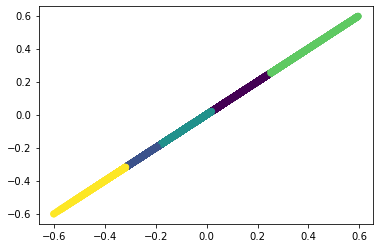

In [47]:
km = KMeans(n_clusters =5)
km.fit(a)
print(pd.Series(km.labels_).value_counts())
plt.scatter(a.iloc[:,0], a.iloc[:,1], c=km.labels_)
a['kmeans'] = km.labels_
df1['kmeans_label'] = a.kmeans

In [50]:
x = df1.khaiii_tokens
y = df1['kmeans_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [51]:
%%time

tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features = 10000,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect.fit(x_train)

Wall time: 1min 9s


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [52]:
%%time
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

Wall time: 1min 1s


In [53]:
models=[dtc,rtc,lgb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()


DecisionTreeClassifier
0.9412857673727238
0.30234113712374583

RandomForestClassifier
0.9412857673727238
0.3770345596432553

LGBMClassifier
0.8886659234485321
0.3741360089186176

XGBClassifier
0.8767744332961724
0.3765886287625418

MLPClassifier
0.938907469342252
0.34715719063545153



## outlier 미제거

In [54]:
df1 = df_aim.copy()
df1 =df1[['khaiii_tokens','6month_return']]

In [55]:
a =pd.concat([df1['6month_return'],df1['6month_return']],axis=1)

In [56]:
from sklearn.cluster import KMeans
inertias=[]
for i in range(1,10):
    km = KMeans(n_clusters=i, init='random')
    km.fit(a)
    inertias.append(km.inertia_)
inertias

[3767.713974574822,
 1918.5909674085235,
 1160.7733555533316,
 762.9594063960759,
 494.91493315292945,
 355.47740236562123,
 276.49489555937805,
 226.12864868424617,
 180.3665461352688]

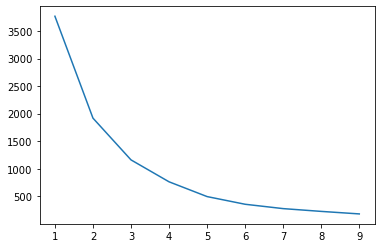

In [57]:
plt.plot(range(1,10),inertias)

0    8990
2    8091
1    1573
3      64
dtype: int64


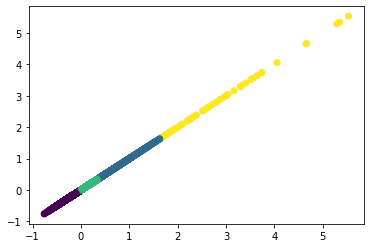

In [58]:
km = KMeans(n_clusters =4)
km.fit(a)
print(pd.Series(km.labels_).value_counts())
plt.scatter(a.iloc[:,0], a.iloc[:,1], c=km.labels_)

In [59]:
a['kmeans'] = km.labels_
df1['kmeans_label'] = a.kmeans


In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [61]:
x = df1.khaiii_tokens
y = df1['kmeans_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [62]:
%%time

tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features = 10000,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect.fit(x_train)

Wall time: 1min 1s


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [63]:
%%time
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

Wall time: 51.6 s


In [64]:
models=[dtc,rtc,lgb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()

DecisionTreeClassifier
0.9574013392221115
0.4741452991452991

RandomForestClassifier
0.9574013392221115
0.5096153846153846

LGBMClassifier
0.9092463313862373
0.5299145299145299

XGBClassifier
0.9181507337227526
0.5185897435897436

MLPClassifier
0.9553355178800399
0.5089743589743589



5    5917
6    5076
0    3073
1    3015
7    1217
2     356
4      49
3      15
dtype: int64


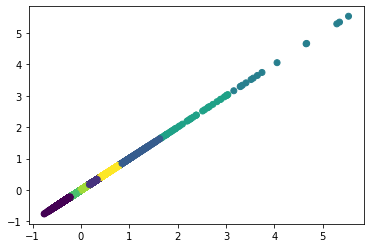

In [65]:
km = KMeans(n_clusters =8)
km.fit(a)
print(pd.Series(km.labels_).value_counts())
plt.scatter(a.iloc[:,0], a.iloc[:,1], c=km.labels_)

In [66]:
a['kmeans'] = km.labels_
df1['kmeans_label'] = a.kmeans


In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [68]:
x = df1.khaiii_tokens
y = df1['kmeans_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [69]:
%%time

tfidf_vect = TfidfVectorizer(stop_words = stopwords, min_df = 50,max_df =0.8, max_features = 10000,\
                                ngram_range = (1, 2),sublinear_tf = True) # TF의 이상치 제거
tfidf_vect.fit(x_train)

Wall time: 57.6 s


TfidfVectorizer(max_df=0.8, max_features=10000, min_df=50, ngram_range=(1, 2),
                stop_words=['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면',
                            '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과',
                            '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에',
                            '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', ...],
                sublinear_tf=True)

In [70]:
%%time
x_train_tfidf_vect = tfidf_vect.transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

Wall time: 47.5 s


In [71]:
models=[dtc,rtc,lgb,xgb,mlp]
for m in models :
    m.fit(x_train_tfidf_vect,y_train)
    print(m.__class__.__name__)
    print(m.score(x_train_tfidf_vect, y_train))
    print(m.score(x_test_tfidf_vect,y_test))
    print()

DecisionTreeClassifier
0.9375267132070095
0.26282051282051283

RandomForestClassifier
0.9375267132070095
0.3192307692307692

LGBMClassifier
0.8625160279242057
0.30085470085470084

XGBClassifier
0.8885881179655222
0.3175213675213675

MLPClassifier
0.9349622453340932
0.3091880341880342

